In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
corr = df.corr()

In [12]:
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [13]:
corr['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

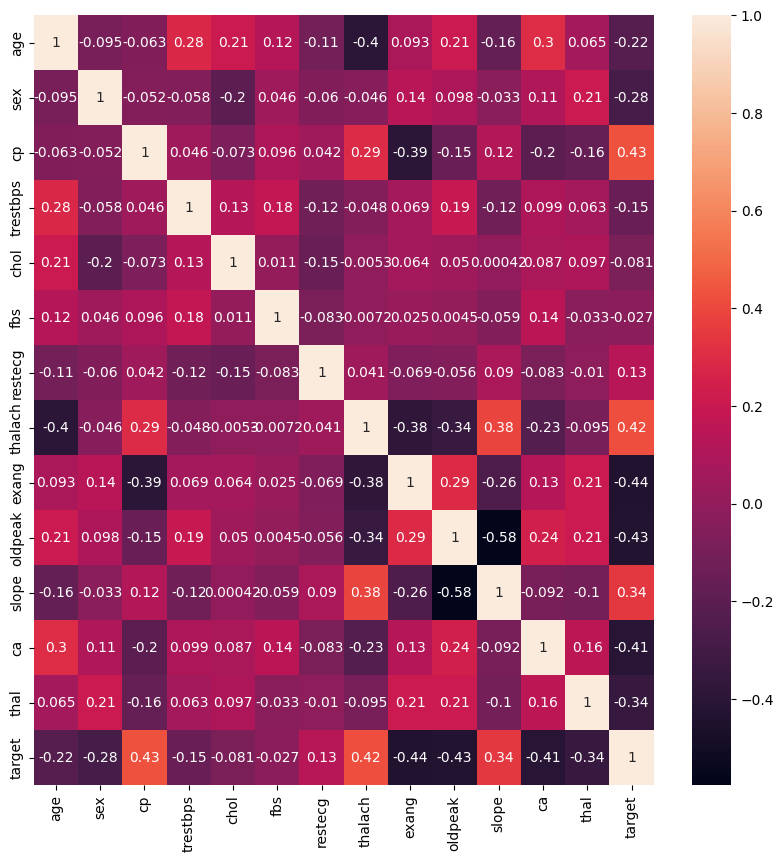

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , annot=True)
plt.show()

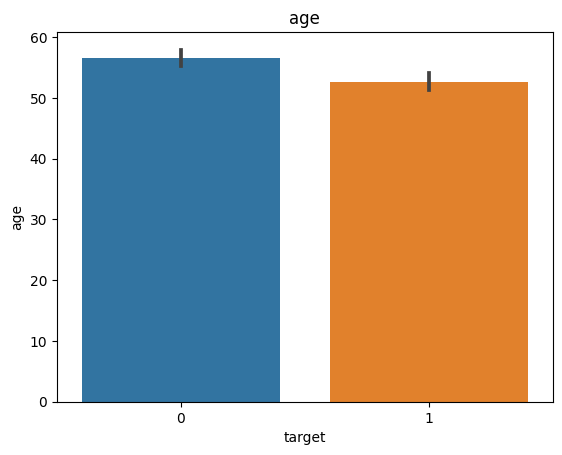

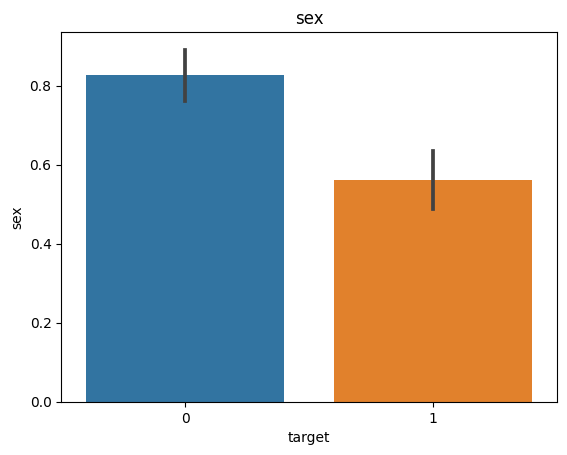

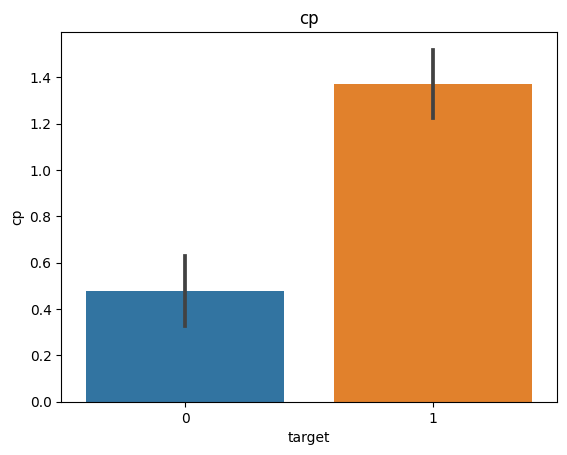

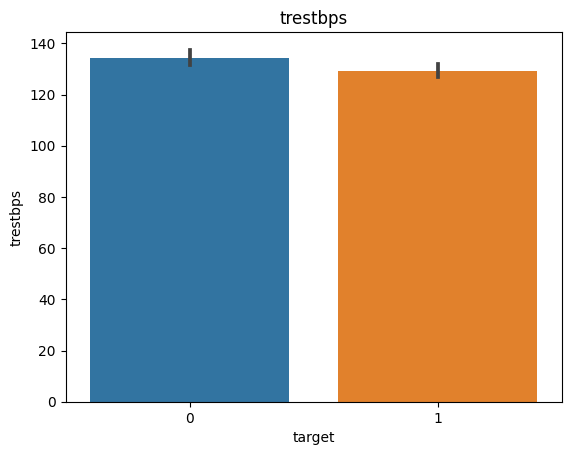

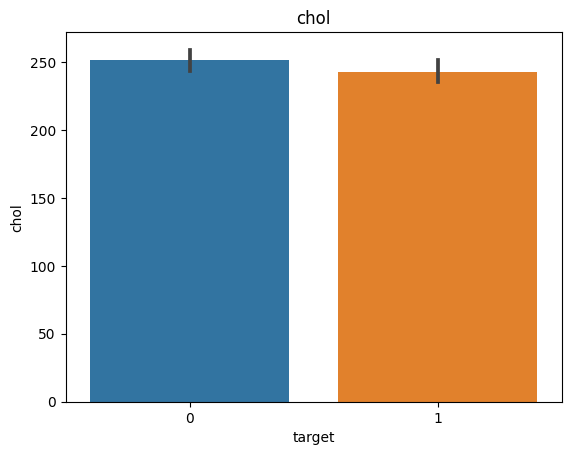

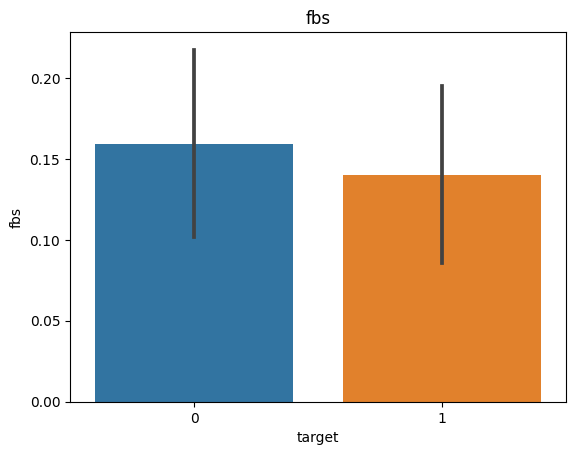

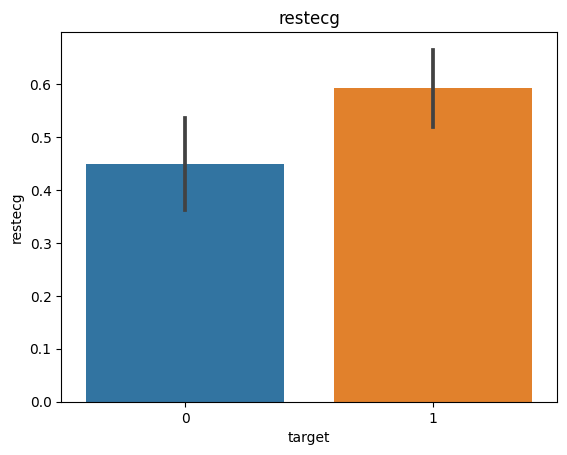

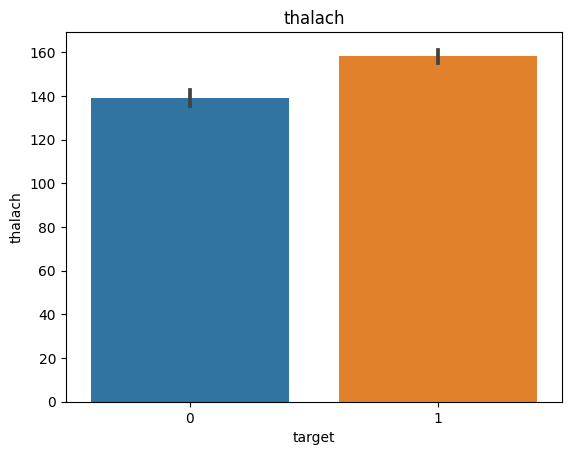

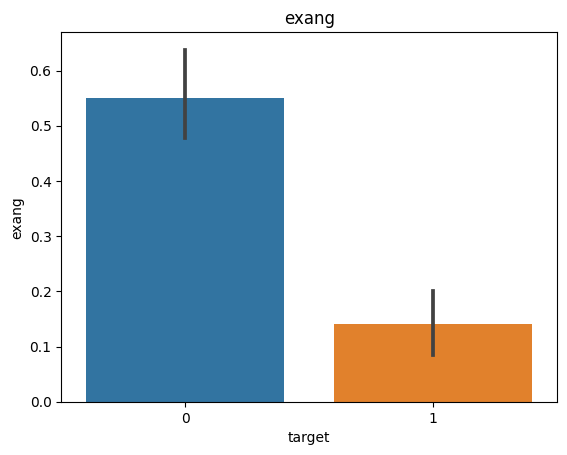

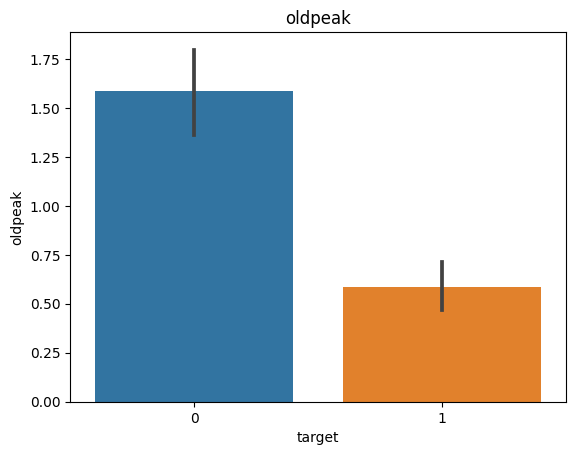

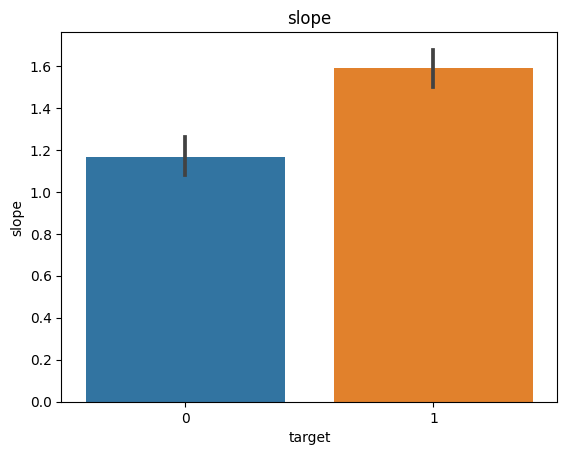

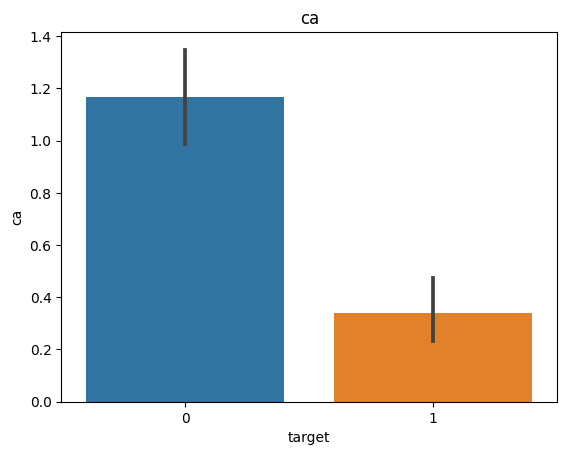

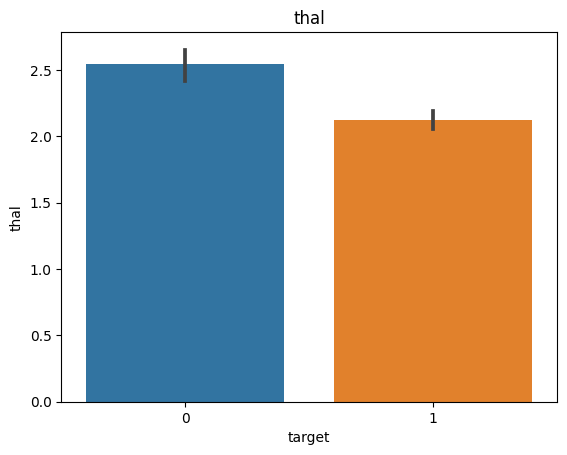

In [15]:
for i in df.columns:
    if i != 'target':
        sns.barplot(data = df , x='target' , y=i)
        plt.title(i)
        plt.show()

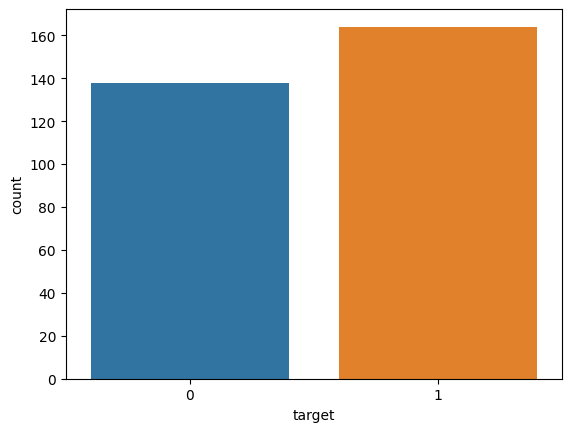

In [16]:
sns.countplot(data = df , x='target')
plt.show()

In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , mean_absolute_error

In [18]:
X = df.drop('target' ,axis =1)
y=df['target']

In [19]:
standard=StandardScaler()

In [20]:
X = standard.fit_transform(X)

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = .25 , random_state=42)

In [22]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((226, 13), (76, 13), (226,), (76,))

In [23]:
SVCModel = SVC(kernel='poly' , max_iter=100)

In [24]:
SVCModel.fit(X_train , y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='poly', max_iter=100)

In [25]:
SVCModel.score(X_train , y_train)

0.9336283185840708

In [26]:
y_pred = SVCModel.predict(X_test)

In [27]:
SVCModel.score(X_test , y_test)

0.8421052631578947

In [28]:
confusion=confusion_matrix(y_test , y_pred)
confusion

array([[27,  8],
       [ 4, 37]])

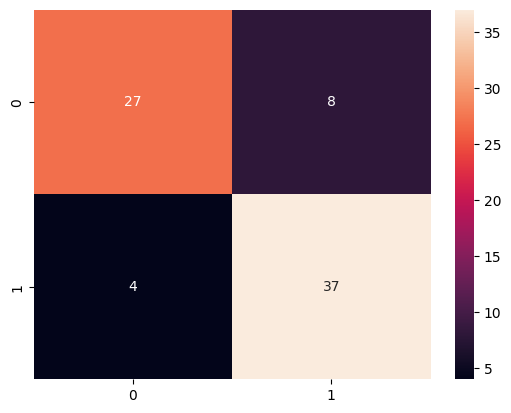

In [29]:
sns.heatmap(confusion , annot=True)
plt.show()

In [30]:
classificationreport=classification_report(y_test , y_pred)

In [31]:
classificationreport

'              precision    recall  f1-score   support\n\n           0       0.87      0.77      0.82        35\n           1       0.82      0.90      0.86        41\n\n    accuracy                           0.84        76\n   macro avg       0.85      0.84      0.84        76\nweighted avg       0.84      0.84      0.84        76\n'

In [32]:
RFModel = RandomForestClassifier(n_estimators=1000, criterion='gini')

In [33]:
RFModel.fit(X_train , y_train)

RandomForestClassifier(n_estimators=1000)

In [34]:
RFModel.score(X_train , y_train)

1.0

In [35]:
RFModel.score(X_test , y_test)

0.8552631578947368

In [36]:
y_pred_RF = RFModel.predict(X_test)

In [37]:
confusionRF=confusion_matrix(y_test , y_pred_RF)
confusionRF

array([[29,  6],
       [ 5, 36]])

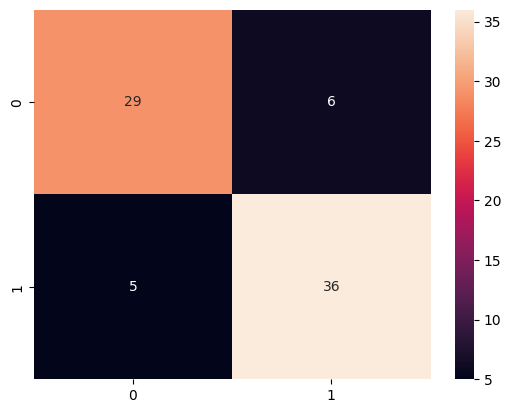

In [38]:
sns.heatmap(confusionRF , annot =True)
plt.show()

In [39]:
DSModel = DecisionTreeClassifier(criterion='log_loss' ,max_depth=10)

In [40]:
DSModel.fit(X_train , y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10)

In [41]:
DSModel.score(X_train , y_train)

1.0

In [42]:
DSModel.score(X_test, y_test)

0.7763157894736842

In [43]:
y_pred_DS = RFModel.predict(X_test)

In [44]:
confusionDS=confusion_matrix(y_test , y_pred_RF)
confusionDS

array([[29,  6],
       [ 5, 36]])

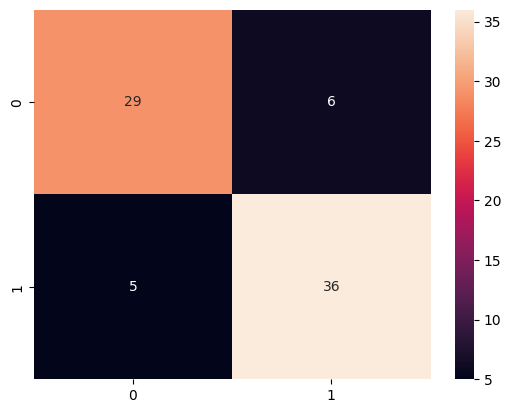

In [45]:
sns.heatmap(confusionDS , annot =True)
plt.show()